In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import os, sys

In [32]:
# set random state
seed = 69
np.random.seed(seed)

## Load Dataset

In [33]:
filepath = '../../data/interim/data_preprocessed.csv'
data = pd.read_csv(filepath)
data.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state,Operational_condition
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1,1
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,1,3
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,1,4
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,1,2
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,1,4


Then, drop the labels

In [34]:
labels =  np.array(data['Health_state'])
data['Health_state'].to_csv('data_preprocessed_cleaned_labels.csv')

# Pipeline

In [35]:
from phm08ds.features.feature_selection import SelectSensors

tf_select_sensors = SelectSensors(kind='custom', sensors=[1,2,3,6,8,10,11,12,13,14,19,20])
data = tf_select_sensors.fit_transform(data)
data.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20,Operational_condition
0,1,1,10.0047,0.2501,20.0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735,1
1,1,2,0.0015,0.0003,100.0,642.13,1584.55,1403.96,553.67,9045.76,47.29,521.81,2388.15,8132.87,8.3907,38.99,23.3619,3
2,1,3,34.9986,0.8401,60.0,555.42,1368.17,1122.49,194.93,8343.91,41.92,183.26,2387.95,8063.84,9.3557,14.83,8.8555,4
3,1,4,20.0031,0.7005,0.0,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832,2
4,1,5,42.0041,0.8405,40.0,549.52,1354.48,1124.32,138.24,8314.56,41.79,130.44,2387.89,8083.67,9.2986,10.99,6.4025,4


In [36]:
from phm08ds.features.feature_selection import RemoveInfo

tf_remove_info = RemoveInfo()

data_with_features = tf_remove_info.fit_transform(data)
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735
1,642.13,1584.55,1403.96,553.67,9045.76,47.29,521.81,2388.15,8132.87,8.3907,38.99,23.3619
2,555.42,1368.17,1122.49,194.93,8343.91,41.92,183.26,2387.95,8063.84,9.3557,14.83,8.8555
3,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832
4,549.52,1354.48,1124.32,138.24,8314.56,41.79,130.44,2387.89,8083.67,9.2986,10.99,6.4025


In [37]:
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735
1,642.13,1584.55,1403.96,553.67,9045.76,47.29,521.81,2388.15,8132.87,8.3907,38.99,23.3619
2,555.42,1368.17,1122.49,194.93,8343.91,41.92,183.26,2387.95,8063.84,9.3557,14.83,8.8555
3,607.03,1488.44,1249.18,334.82,8721.53,44.26,314.84,2388.07,8052.30,9.2231,24.42,14.7832
4,549.52,1354.48,1124.32,138.24,8314.56,41.79,130.44,2387.89,8083.67,9.2986,10.99,6.4025


In [38]:
data_with_features.to_csv('data_preprocessed_cleaned.csv')

In [39]:
from sklearn.preprocessing import StandardScaler

tf_std_scaller = preprocessing.StandardScaler()
data_with_features_std = tf_std_scaller.fit_transform(data_with_features)
data_with_features_std

array([[ 0.65613257,  0.7480038 ,  0.87228043, ..., -0.94547527,
         0.78791419,  0.79220892],
       [ 1.67242914,  1.54867518,  1.65864837, ..., -1.25259429,
         1.83904831,  1.83369583],
       [-0.64659916, -0.48715647, -0.69577121, ...,  0.03094771,
        -0.60047142, -0.60768251],
       ...,
       [-0.79369471, -0.57145747, -0.46440287, ...,  0.19986982,
        -1.05081322, -1.05496448],
       [-0.61637771, -0.37538237, -0.5033825 , ...,  0.11806896,
        -0.61359797, -0.63787493],
       [-1.12693301, -1.36704821, -1.14512432, ...,  2.18450507,
        -0.66509446, -0.6654924 ]])

In [40]:
X = data_with_features_std
y = labels

In [10]:
from sklearn.pipeline import Pipeline

data_preprocessing = Pipeline([('select_sensors', tf_select_sensors),
                               ('remove_info', tf_remove_info),
                               ('std_scaler', tf_std_scaller)
                              ])

In [11]:
from sklearn.externals import joblib

joblib.dump(data_preprocessing, '../../models/pipeline/select-sensorNavar_remove-info_std-scaller-withoutOC.pkl')

['../../models/pipeline/select-sensorNavar_remove-info_std-scaller-withoutOC.pkl']

# Classification steps

## Load classifiers

In [12]:
classifiers = joblib.load('models/classifiers.pkl')

In [13]:
mlp_clf = classifiers['MLP']
mlp_clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Load model selection object

In [14]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 2, random_state=seed, shuffle=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [15]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
y_hat = mlp_clf.predict(X_test)
y_hat_proba = mlp_clf.predict_proba(X_test)

### Performance acessment

In [17]:
from sklearn import metrics

In [18]:
conf_mat = metrics.classification.confusion_matrix(y_test, y_hat)
acc = metrics.classification.accuracy_score(y_test, y_hat)
acc

0.6397769840578448

In [19]:
from phm08ds.utils import metrics as met

met.conf_mat_percentage(conf_mat)

array([[ 1.30589632, 24.09972299, 74.43609023,  0.15829046],
       [ 0.60401063, 16.30828703, 82.96690022,  0.12080213],
       [ 0.11180471,  4.80760272, 88.66113854,  6.41945402],
       [ 0.        ,  0.        , 19.69778737, 80.30221263]])

## Filter by the mode

In [20]:
from scipy import stats

# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

def predict_mode(y_hat, t):
    y_hat_mode = []
    for k in list(chunks(y_hat, t)):
        result_mode = stats.mode(k)
        y_hat_mode.append(result_mode.mode)
    
    return np.array(y_hat_mode)

In [21]:
t = 3

y_test_mode = predict_mode(y_test, t)
y_hat_mode = predict_mode(y_hat, t)

print('acc: {}'.format(metrics.accuracy_score(y_test_mode, y_hat_mode)))

met.conf_mat_percentage(metrics.confusion_matrix(y_test_mode, y_hat_mode))

acc: 0.6512478766496799


array([[ 1.54028436, 22.39336493, 76.06635071,  0.        ],
       [ 0.73099415, 12.71929825, 86.5497076 ,  0.        ],
       [ 0.16750419,  3.1546622 , 91.59687326,  5.08096036],
       [ 0.        ,  0.        , 18.45077999, 81.54922001]])

In [22]:
acc_with_mode = []

for t in np.arange(1, 125):
    y_test_mode = predict_mode(y_test, t)
    y_hat_mode = predict_mode(y_hat, t)
    
    
    acc_with_mode.append(metrics.accuracy_score(y_test_mode, y_hat_mode))
    
acc_with_mode = np.array(acc_with_mode)

## Generate figure

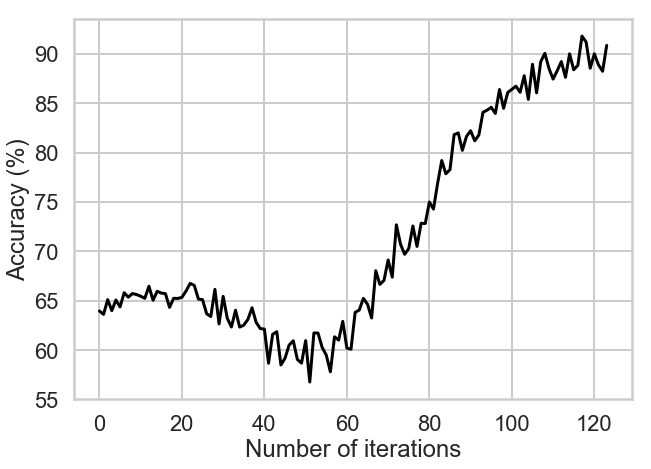

In [23]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

plt.figure(figsize=(10,7))
# ax = plt.subplots()
plt.plot(acc_with_mode*100, 'k')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')

# fig.savefig('myimage.svg', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-withoutOC.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-withoutOC.png', format='png', dpi=300, bbox_inches='tight')